In [15]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 KB 776.8 kB/s eta 0:00:001m537.9 kB/s eta 0:00:01
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 KB 1.6 MB/s eta 0:00:003.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 2.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 2.5 MB/s eta 0:00:002.7 

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings as w

w.filterwarnings("ignore")

### Dark mode config for charts

In [17]:
# Create a custom style dictionary
dark_mode_style = {
    'figure.facecolor': '#313131',  # Dark grey background color for the figure
    'axes.facecolor': '#383838',    # Dark grey background color for each plot
    'axes.edgecolor': 'white',      # White edges for each plot
    'axes.labelcolor': 'white',     # White color for the x and y labels
    'text.color': 'white',          # White color for any text
    'xtick.color': 'white',         # White color for x-axis tick marks
    'ytick.color': 'white',         # White color for y-axis tick marks
    'grid.color': 'gray',           # Lighter grey grid lines (adjust as needed)
    'figure.autolayout': True       # Auto-adjust layout to prevent overlap
}

# Apply the style settings
plt.rcParams.update(dark_mode_style)

### Mage data

In [20]:
def preprocessing_yf(symbol):
    df = yf.download(symbol).dropna()
    
    df.columns = ["open", "heigh", "low", "close", "adj_close", "volume"]
    df.index.name = "time"
    
    del df["adj_close"]
    
    return df

In [18]:
def preprocessing_file(file):
    df = pd.read_csv(file, delimiter="/t", index_col="<DATE>", parse_dates=True).dropna()
    
    df = df.iloc[:,:-2]
    
    df.columns = ["open", "heigh", "low", "close", "volume"]
    df.index.name = "time"
    
    return df

In [35]:
df = preprocessing_yf("EURUSD=X")

[*********************100%%**********************]  1 of 1 completed


### SMA

In [36]:
df["SMA fast (30 days)"] = df["close"].rolling(30).mean()
df["SMA slow (60 days)"] = df["close"].rolling(60).mean()
df

,open,heigh,low,close,volume,SMA fast (30 days),SMA slow (60 days)
time,,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,0,NaN,NaN
2003-12-02,1.196101,1.210903,1.194600,1.208897,0,NaN,NaN
2003-12-03,1.209000,1.213003,1.207700,1.212298,0,NaN,NaN
2003-12-04,1.212004,1.214403,1.204398,1.208094,0,NaN,NaN
2003-12-05,1.207802,1.219096,1.206593,1.218695,0,NaN,NaN
...,...,...,...,...,...,...,...
2024-04-10,1.085930,1.086838,1.073376,1.085930,0,1.085736,1.083663
2024-04-11,1.074172,1.075581,1.070045,1.074172,0,1.085412,1.083423
2024-04-12,1.072685,1.072961,1.062372,1.072685,0,1.085152,1.083169


<Axes: title={'center': 'EUR/USD Close Price and Moving Averages'}, xlabel='time'>

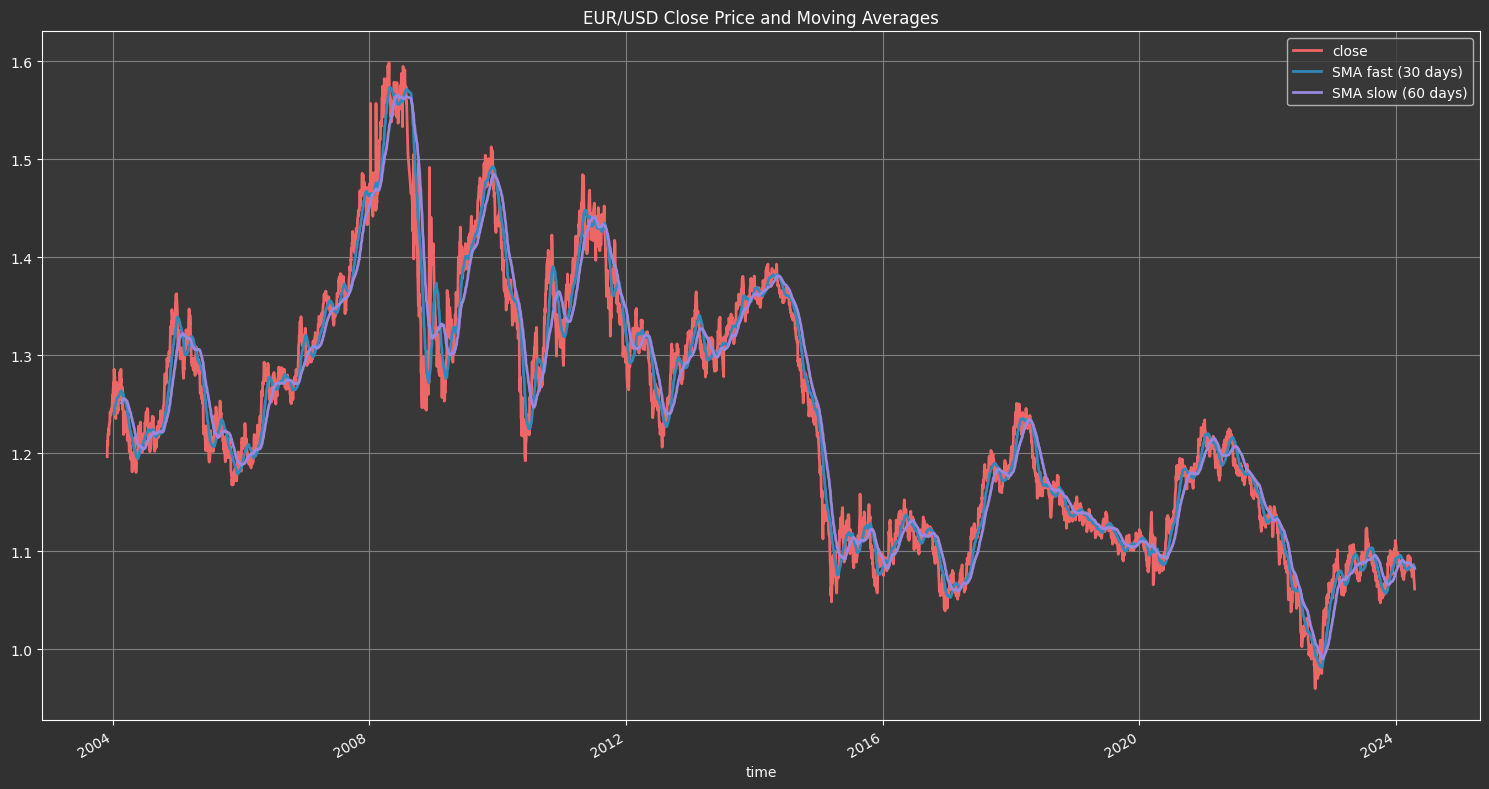

In [38]:
df[["close", "SMA fast (30 days)", "SMA slow (60 days)"]].plot(figsize=(15, 8), title="EUR/USD Close Price and Moving Averages")